## Pré-Processamentos dos dados do Enade 2017 referentes aos cursos de Ciência da Computação das universidades/faculdades do nordeste

In [1]:
# Biblioteca científica
import numpy as np
# Biblioteca para análise de dados
import pandas as pd
# Suprimindo os warnings da biblioteca pandas
pd.options.mode.chained_assignment = None
# Bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
import missingno as msno
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Dados do Enade 2017 (Cursos de computação das universidades/faculdades do nordeste)
df = pd.read_csv('dados/computacao_ne_enade2017.csv')

In [3]:
# Exibindo o cabeçalho do dataframe
df.head()

,CO_IES,Instituicao,CO_CATEGAD,CO_CURSO,NO_CURSO,Municipio,UF,TP_SEXO,NU_IDADE,QE_I01,...,QE_I18,QE_I19,QE_I20,QE_I21,QE_I22,QE_I23,QE_I24,QE_I25,QE_I26,NT_GER
0,548,UNIVERSIDADE FEDERAL DO MARANHÃO (UFMA),1,11452,CIÊNCIA DA COMPUTAÇÃO,São Luís,MA,M,27,D,...,A,A,A,A,D,21,A,A,A,45.0
1,548,UNIVERSIDADE FEDERAL DO MARANHÃO (UFMA),1,11452,CIÊNCIA DA COMPUTAÇÃO,São Luís,MA,F,22,E,...,A,A,B,D,A,21,A,B,F,48.0
2,548,UNIVERSIDADE FEDERAL DO MARANHÃO (UFMA),1,11452,CIÊNCIA DA COMPUTAÇÃO,São Luís,MA,M,27,B,...,A,A,A,A,A,21,B,A,A,55.0
3,548,UNIVERSIDADE FEDERAL DO MARANHÃO (UFMA),1,11452,CIÊNCIA DA COMPUTAÇÃO,São Luís,MA,M,32,B,...,A,F,G,A,C,B,C,A,I,NaN
4,548,UNIVERSIDADE FEDERAL DO MARANHÃO (UFMA),1,11452,CIÊNCIA DA COMPUTAÇÃO,São Luís,MA,M,32,D,...,A,A,A,A,B,21,B,A,B,23.0


In [4]:
# Exibindo as informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 34 columns):
CO_IES         1816 non-null int64
Instituicao    1816 non-null object
CO_CATEGAD     1816 non-null int64
CO_CURSO       1816 non-null int64
NO_CURSO       1816 non-null object
Municipio      1816 non-null object
UF             1816 non-null object
TP_SEXO        1816 non-null object
NU_IDADE       1816 non-null int64
QE_I01         1647 non-null object
QE_I02         1647 non-null object
QE_I04         1647 non-null object
QE_I05         1647 non-null object
QE_I06         1647 non-null object
QE_I07         1646 non-null object
QE_I08         1623 non-null object
QE_I09         1623 non-null object
QE_I10         1623 non-null object
QE_I11         1623 non-null object
QE_I12         1623 non-null object
QE_I13         1623 non-null object
QE_I14         1623 non-null object
QE_I15         1623 non-null object
QE_I17         1623 non-null object
QE_I18         1623 non-null obje

In [5]:
# Exibindo a quantidade de valores faltantes por coluna
df.isnull().sum()

CO_IES           0
Instituicao      0
CO_CATEGAD       0
CO_CURSO         0
NO_CURSO         0
Municipio        0
UF               0
TP_SEXO          0
NU_IDADE         0
QE_I01         169
QE_I02         169
QE_I04         169
QE_I05         169
QE_I06         169
QE_I07         170
QE_I08         193
QE_I09         193
QE_I10         193
QE_I11         193
QE_I12         193
QE_I13         193
QE_I14         193
QE_I15         193
QE_I17         193
QE_I18         193
QE_I19         193
QE_I20         193
QE_I21         193
QE_I22         193
QE_I23         193
QE_I24         193
QE_I25         193
QE_I26         193
NT_GER         233
dtype: int64

Podemos perceber, acima, que alguns atributos estão com dados faltantes. Para melhor visualizar esses dados vejamos a visualização abaixo.

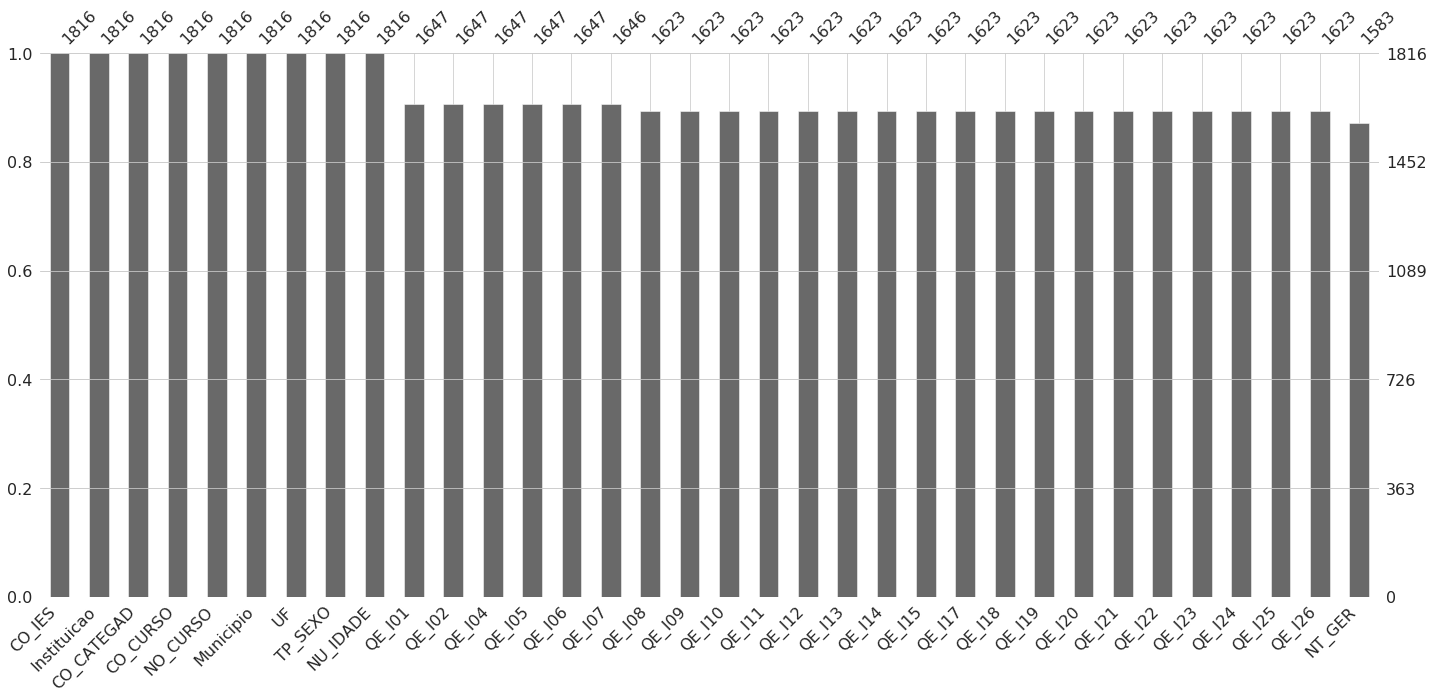

In [6]:
# Exibindo as colunas com valores faltantes
# msno.matrix(df)
fig, ax = plt.subplots(figsize=(12,6))
ax = msno.bar(df)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [7]:
# Listando as colunas do dataframe
df.columns

Index(['CO_IES', 'Instituicao', 'CO_CATEGAD', 'CO_CURSO', 'NO_CURSO',
       'Municipio', 'UF', 'TP_SEXO', 'NU_IDADE', 'QE_I01', 'QE_I02', 'QE_I04',
       'QE_I05', 'QE_I06', 'QE_I07', 'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11',
       'QE_I12', 'QE_I13', 'QE_I14', 'QE_I15', 'QE_I17', 'QE_I18', 'QE_I19',
       'QE_I20', 'QE_I21', 'QE_I22', 'QE_I23', 'QE_I24', 'QE_I25', 'QE_I26',
       'NT_GER'],
      dtype='object')

In [8]:
colunas = ['TP_SEXO', 'NU_IDADE', 'QE_I01', 'QE_I02', 'QE_I04',
           'QE_I05', 'QE_I06', 'QE_I07', 'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11',
           'QE_I12', 'QE_I13', 'QE_I14', 'QE_I15', 'QE_I17', 'QE_I18', 'QE_I19',
           'QE_I20', 'QE_I21', 'QE_I22', 'QE_I23', 'QE_I24', 'QE_I25', 'QE_I26',
           'NT_GER']

In [9]:
# Verificando os valores das colunas
for col in colunas:
    print('COLUNA: ', col, '\n', df[col].value_counts())

COLUNA:  TP_SEXO 
 M    1589
F     227
Name: TP_SEXO, dtype: int64
COLUNA:  NU_IDADE 
 23    254
22    237
24    234
25    201
26    170
21    151
27    121
28     84
29     59
30     57
31     49
32     47
20     23
33     23
34     22
35     19
36     19
37      9
39      6
40      6
44      5
38      4
42      4
41      3
47      3
45      2
54      1
43      1
46      1
55      1
Name: NU_IDADE, dtype: int64
COLUNA:  QE_I01 
 C    822
B    368
A    246
D    131
.     49
E     30
*      1
Name: QE_I01, dtype: int64
COLUNA:  QE_I02 
 B    838
A    365
C    196
D    173
.     49
E     20
F      5
*      1
Name: QE_I02, dtype: int64
COLUNA:  QE_I04 
 C    725
B    462
D    272
A     96
.     49
E     35
F      6
*      2
Name: QE_I04, dtype: int64
COLUNA:  QE_I05 
 B    507
D    390
A    367
E    188
C    131
.     49
F     10
*      5
Name: QE_I05, dtype: int64
COLUNA:  QE_I06 
 D    905
C    365
B    184
E     76
A     60
.     53
*      3
F      1
Name: QE_I06, dtype: int64
COLUNA: 

Verificamos acima que muitas das colunas contém caracteres  "**.**" que corresponde a "**Não respondeu**" e "*****" que corresponde a **Resposta anulada**. 

Também verifica-se que as colunas **QE_I22** e **QE_I23** apresentam respostas trocadas, ou seja, o que era para estar em uma está em outra. Por exemplo: 

A coluna **QE_I21** que se refere a *Alguém em sua família concluiu um curso superior?*  deveria conter somente valores como: \[A, B, C, D, E\] no entanto, contém 2 valores numéricos. Logo, as linhas onde estão estes valores serão removidas.

A coluna **QE_I22** que se refere a *quantidade de livros que não estão na bibliografia e que o aluno leu*  deveria conter somente valores como: \[A, B, C, D, E\] no entanto, contém alguns valores numéricos. Logo, as linhas onde estão estes valores serão removidas.

A coluna **QE_I23** que se refere a *quantas horas por semana os alunos dedicam ao estudo* e, assim como a anterior, deveria conter somente valores como: \[A, B, C, D, E\] no entanto, contém muitos valores numéricos. Logo, essa coluna será removida.

In [10]:
# Valores presentes na coluna "QE_I21"
df.QE_I21.value_counts().sort_index(ascending=True)

24       1
25       1
A     1451
B      137
C        9
D       10
E        4
F       10
Name: QE_I21, dtype: int64

In [11]:
# Removendo as linhas que contém como resposta para a coluna "QE_I21" os valores [24 e 25]
df = df.drop(df[df.QE_I21.isin(['24','25'])].index.values, axis=0)

In [12]:
# Conferindo a coluna "QE_I21"
df.QE_I21.value_counts()

A    1451
B     137
F      10
D      10
C       9
E       4
Name: QE_I21, dtype: int64

In [13]:
# Valores presentes na coluna "QE_I22"
df.QE_I22.value_counts().sort_index()

21       2
22       2
23       8
24       4
25       6
26      17
27       2
28       2
29      12
A     1184
B       61
C       60
D      180
E       71
F       10
Name: QE_I22, dtype: int64

In [14]:
# Removendo as linhas que contém como resposta para a coluna "QE_I21" os valores [21 a 29]
df = df.drop(df[df.QE_I22.isin(['21','22','23','24','25','26','27','28','29'])].index.values, axis=0)

In [15]:
# Conferindo a coluna a coluna "QE_I22"
df.QE_I22.value_counts().sort_index()

A    1184
B      61
C      60
D     180
E      71
F      10
Name: QE_I22, dtype: int64

In [16]:
# Valores presentes na coluna "QE_I22"
df.QE_I23.value_counts().sort_index(ascending=True)

11      1
13      4
14      1
15      2
16      1
21    161
22    134
23    332
24     66
25    139
26    343
27     72
28     42
29    187
32      1
33      3
35      4
43      1
51      1
99      7
A       4
B      22
C      22
D       7
E       9
Name: QE_I23, dtype: int64

In [17]:
# Removendo a coluna QE_I23
df = df.drop('QE_I23', axis=1)

In [18]:
# Substituir os caracteres '.' e '*' por np.NaN
df = df.replace(['.', '*'], np.nan)

In [19]:
# Remover linhas com dados faltantes (Incluíndo, agora, as linhas que apresentam as características:
# Resposta anulada e/ou Não Respondeu)
df = df.dropna()

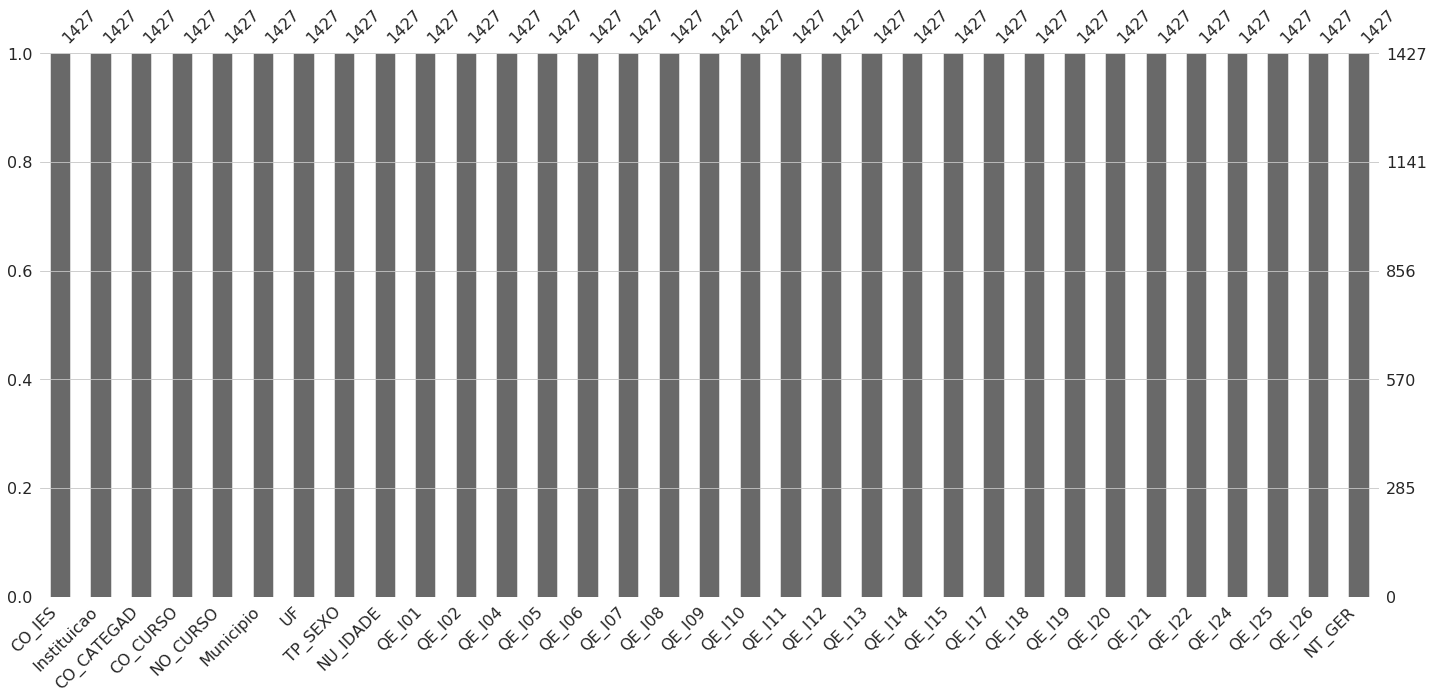

In [20]:
# Exibindo as colunas após a remoção das linhas com valores faltantes
msno.bar(df)
plt.show()

In [21]:
# Salvando o dataframe resultante
df.to_csv('dados/enade2017_computacao_ne_clean.csv', index=False)